## E-commerce Conversion Funnel Analysis: Customer Journey Optimization

### Analysis Overview
This notebook presents a comprehensive analysis of customer behavior patterns in the Udemy e-commerce dataset, with a focus on understanding and optimizing the conversion funnel. The analysis employs multiple visualization techniques to identify bottlenecks, track performance trends, and provide actionable insights for improving user experience and conversion rates.

### Key Analytical Components:

**1. Customer Journey Funnel Analysis**
- **Stage-by-stage conversion tracking**: Quantify user progression from landing page to order completion
- **Drop-off rate identification**: Pinpoint critical stages where users abandon the conversion process
- **Conversion rate optimization**: Analyze transitions between each funnel stage to identify optimization opportunities

**2. Cohort-Based Behavioral Analysis**
- **Monthly cohort segmentation**: Group users by acquisition month to track retention and conversion patterns
- **Trend identification**: Analyze how conversion behaviors evolve across different user cohorts over time
- **Comparative performance**: Evaluate which cohorts demonstrate the strongest conversion characteristics

**3. Multi-dimensional Performance Dashboard**
- **Multi-funnel visualization**: Horizontal bar charts showing progression rates with drop-off indicators
- **Stream plot cohort analysis**: Visual representation of conversion distribution across multiple cohorts
- **Key performance indicators**: Consolidated metrics including overall conversion, cart abandonment, and stage-specific performance
- **Actionable insights**: Data-driven recommendations for improving specific conversion bottlenecks

### Analytical Objectives:
1. **Identify Conversion Bottlenecks**: Determine which stages of the purchase process experience the highest drop-off rates
2. **Track Performance Trends**: Analyze how conversion metrics evolve across different user cohorts
3. **Provide Optimization Recommendations**: Offer specific, data-backed suggestions for improving conversion rates
4. **Establish Performance Benchmarks**: Create baseline metrics for ongoing performance monitoring

### Methodology:
- **Data Processing**: Clean and structure session-level data to track user progression through the conversion funnel
- **Cohort Construction**: Segment users by acquisition period to enable time-based behavioral analysis
- **Visual Analytics**: Employ multiple chart types to present the same data from different analytical perspectives
- **Statistical Analysis**: Calculate conversion rates, drop-off percentages, and cohort performance metrics

### Expected Outcomes:
- Clear identification of the most critical conversion barriers in the current user journey
- Understanding of how user conversion behaviors have changed over time
- Specific recommendations for optimizing the conversion funnel
- A reusable analytical framework for ongoing e-commerce performance monitoring

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set display options for better readability
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
plt.style.use('default') 
# customize color pallete
colors = ['#6DC3BB', '#393D7E', '#5459AC', '#F2AEBB', '#C1E59F', '#9CC6DB']

#### -- Load data --

In [3]:
order_items = pd.read_csv('data/order_items.csv', sep=';') # specify separator as ;
orders = pd.read_csv('data/orders.csv', sep=';')
products = pd.read_csv('data/products.csv', sep=';')
website_pageviews = pd.read_csv('data/website_pageviews.csv', sep=';')
website_sessions = pd.read_csv('data/website_sessions.csv', sep=';')
order_item_refunds = pd.read_csv('data/order_item_refunds.csv', sep=';')

In [4]:
orders.head(2)   

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49


In [5]:
print(orders.columns)
print(products.columns)
print(order_items.columns)
print(website_pageviews.columns)
print(website_sessions.columns)
print(order_item_refunds.columns)

Index(['order_id', 'created_at', 'website_session_id', 'user_id',
       'primary_product_id', 'items_purchased', 'price_usd', 'cogs_usd'],
      dtype='object')
Index(['product_id', 'created_at', 'product_name'], dtype='object')
Index(['order_item_id', 'created_at', 'order_id', 'product_id',
       'is_primary_item', 'price_usd', 'cogs_usd'],
      dtype='object')
Index(['website_pageview_id', 'created_at', 'website_session_id',
       'pageview_url'],
      dtype='object')
Index(['website_session_id', 'created_at', 'user_id', 'is_repeat_session',
       'utm_source', 'utm_campaign', 'utm_content', 'device_type',
       'http_referer'],
      dtype='object')
Index(['order_item_refund_id', 'created_at', 'order_item_id', 'order_id',
       'refund_amount_usd'],
      dtype='object')


In [6]:
# convert date columns to datetime
date_columns = {
    'orders': ['created_at'],
    'website_sessions': ['created_at'],
    'website_pageviews': ['created_at'],
    'order_item_refunds': ['created_at'],
    'products': ['created_at'],
    'order_items': ['created_at']
}
for df_name, cols in date_columns.items():
    for col in cols:
        if col in globals()[df_name].columns:
            globals()[df_name][col] = pd.to_datetime(globals()[df_name][col])

In [7]:
# basic infomation for all datasets
datasets = {
    'orders': orders,
    'products': products,
    'order_items': order_items,
    'website_pageviews': website_pageviews,
    'website_sessions': website_sessions,
    'order_item_refunds': order_item_refunds
}
for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    print(f"Shape: {df.shape}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Data types:\n{df.dtypes}")
    print(f"Sample:\n{df.head(2)}")


=== ORDERS ===
Shape: (32313, 8)
Missing values:
order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64
Data types:
order_id                       int64
created_at            datetime64[ns]
website_session_id             int64
user_id                        int64
primary_product_id             int64
items_purchased                int64
price_usd                    float64
cogs_usd                     float64
dtype: object
Sample:
   order_id          created_at  website_session_id  user_id  \
0         1 2012-03-19 10:42:46                  20       20   
1         2 2012-03-19 19:27:37                 104      104   

   primary_product_id  items_purchased  price_usd  cogs_usd  
0                   1                1      49.99     19.49  
1                   1                1      49.99     19.49  

=== PRODUCTS ===
Shape: (4, 3)
Miss

### Customer Journey Analysis

##### 1) Conversion Rate Analysis

In [8]:
orders.head(2)

,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49


In [9]:
print("\n" + "="*60)
print("Conversion Rate Analysis")
print("="*60)

# session to order conversion analysis
session_order = website_sessions.merge(
    orders[['order_id', 'website_session_id']].drop_duplicates(), # drop duplicates to avoid multiple matches
    on = 'website_session_id',
    how = 'left', # left join to keep all sessions
    indicator = True # to track merge source
)

print(session_order['_merge'].value_counts())


Conversion Rate Analysis
_merge
left_only     440558
both           32313
right_only         0
Name: count, dtype: int64


In [10]:
# calculate overall conversion rate
total_sessions = len(session_order)
sessions_with_orders = (session_order['_merge'] == 'both').sum()
conversion_rate = sessions_with_orders / total_sessions * 100

print(f"Overall Conversion Rate:")
print(f"Total Sessions: {total_sessions:,}")
print(f"Sessions with Orders: {sessions_with_orders:,}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Overall Conversion Rate:
Total Sessions: 472,871
Sessions with Orders: 32,313
Conversion Rate: 6.83%


Text(0.5, 1.0, 'Overall session-to-order conversion rate\n(6.8%)')

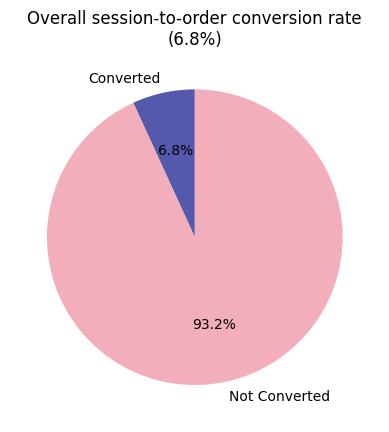

In [11]:
# compare conversion rates with pie chart
conversion_labels = ['Converted', 'Not Converted']
conversion_sizes = [conversion_rate, 100 - conversion_rate]
conversion_colors = colors[2:4]
plt.pie(conversion_sizes, labels=conversion_labels, colors=conversion_colors, 
               autopct='%1.1f%%', startangle=90)
plt.title(f'Overall session-to-order conversion rate\n({conversion_rate:.1f}%)')

##### -- Daily trend

In [12]:
# create a time-based conversion rate analysis
session_order['date'] = session_order['created_at'].dt.date
daily_conversion = session_order.groupby('date').apply(
    lambda x: pd.Series({
        'total_sessions': len(x),
        'sessions_with_orders': (x['_merge'] == 'both').sum(),
        'conversion_rate': (x['_merge'] == 'both').sum() / len(x) * 100 if len(x) > 0 else 0
    })
).reset_index()
print(daily_conversion.head())

         date  total_sessions  sessions_with_orders  conversion_rate
0  2012-03-19          137.00                  2.00             1.46
1  2012-03-20          161.00                  6.00             3.73
2  2012-03-21          191.00                  9.00             4.71
3  2012-03-22          177.00                  4.00             2.26
4  2012-03-23          156.00                  3.00             1.92


C:\Users\yiyiw\AppData\Local\Temp\ipykernel_2212\583654304.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_conversion = session_order.groupby('date').apply(


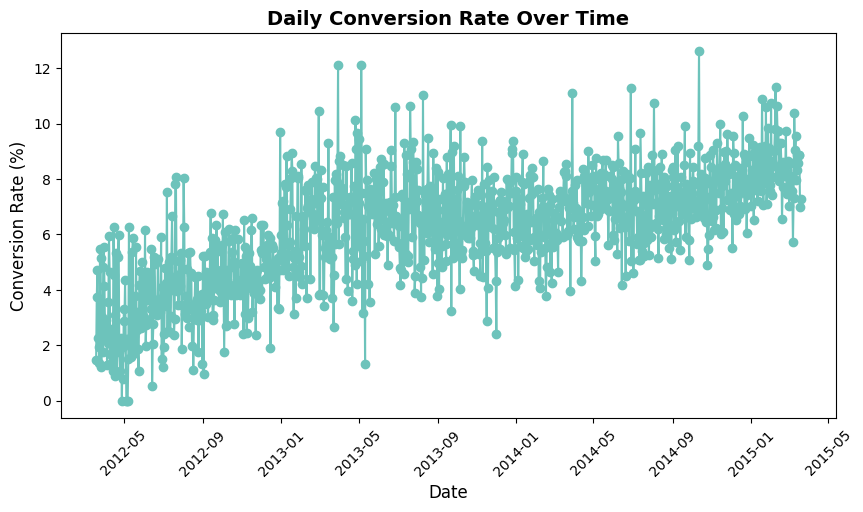

In [13]:
# visualize daily conversion rate
plt.figure(figsize=(10, 5))
line = plt.plot(daily_conversion['date'], daily_conversion['conversion_rate'], marker='o', color=colors[0])
plt.title('Daily Conversion Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### -- Yearly trend

In [14]:
# yearly conversion rate trend analysis
session_order['year'] = session_order['created_at'].dt.year
yearly_conversion = session_order.groupby('year').apply(
    lambda x: pd.Series({
        'total_sessions': len(x),
        'sessions_with_orders': (x['_merge'] == 'both').sum(),
        'conversion_rate': (x['_merge'] == 'both').sum() / len(x) * 100 if len(x) > 0 else 0
    })
).reset_index()
print(yearly_conversion.head())

   year  total_sessions  sessions_with_orders  conversion_rate
0  2012       62,470.00              2,586.00             4.14
1  2013      112,781.00              7,447.00             6.60
2  2014      233,422.00             16,860.00             7.22
3  2015       64,198.00              5,420.00             8.44


C:\Users\yiyiw\AppData\Local\Temp\ipykernel_2212\229070464.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_conversion = session_order.groupby('year').apply(


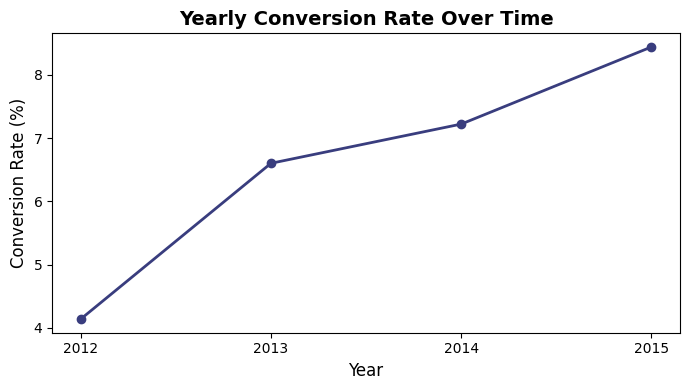

In [15]:
yearly_conversion = yearly_conversion.sort_values('year')
yearly_conversion['year'] = yearly_conversion['year'].astype(int).astype(str)  # convert to string

plt.figure(figsize=(7, 4))
plt.plot(yearly_conversion['year'], yearly_conversion['conversion_rate'], marker='o', color=colors[1], linewidth=2)

plt.title('Yearly Conversion Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)

plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

##### -- Monthly trend

In [16]:
# monthly conversion rate trend analysis
session_order['month'] = session_order['created_at'].dt.to_period('M')
monthly_conversion = session_order.groupby('month').apply(
        lambda x: pd.Series({
        'total_sessions': len(x),
        'sessions_with_orders': (x['_merge'] == 'both').sum(),
        'conversion_rate': (x['_merge'] == 'both').sum() / len(x) * 100 if len(x) > 0 else 0
    })
).reset_index()
print(monthly_conversion.head())

     month  total_sessions  sessions_with_orders  conversion_rate
0  2012-03        1,879.00                 60.00             3.19
1  2012-04        3,734.00                 99.00             2.65
2  2012-05        3,736.00                108.00             2.89
3  2012-06        3,963.00                140.00             3.53
4  2012-07        4,249.00                169.00             3.98


C:\Users\yiyiw\AppData\Local\Temp\ipykernel_2212\2291002756.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_conversion = session_order.groupby('month').apply(


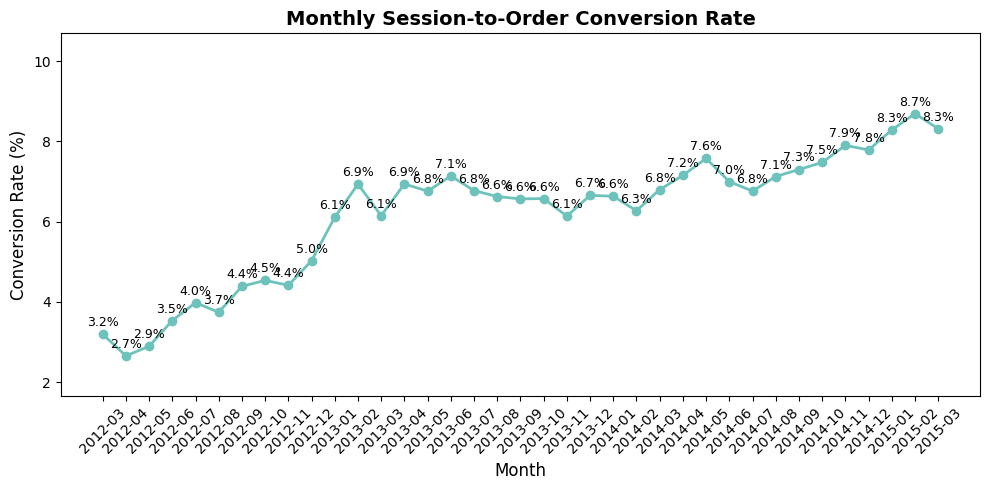

In [17]:
# visulize monthly conversion rate trend analysis
plt.figure(figsize=(10, 5))
plt.plot(monthly_conversion['month'].astype(str), monthly_conversion['conversion_rate'], marker='o', color=colors[0], linewidth=2)
plt.title('Monthly Session-to-Order Conversion Rate', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
# annotate data points
for i, rate in enumerate(monthly_conversion['conversion_rate']):
    plt.text(i, rate + 0.2, f'{rate:.1f}%', ha='center', fontsize=9)
# set y-axis limit
plt.ylim(monthly_conversion['conversion_rate'].min() - 1, monthly_conversion['conversion_rate'].max() + 2)
plt.grid(False)
plt.tight_layout()
plt.show()

##### 2) Funnel Analysis (multi-step conversion)

In [18]:
website_pageviews['pageview_url'].value_counts()

pageview_url
/products                      261231
/the-original-mr-fuzzy         162525
/home                          137576
/lander-2                      131170
/cart                           94953
/lander-3                       79000
/lander-5                       68166
/shipping                       64484
/billing-2                      48441
/lander-1                       47574
/thank-you-for-your-order       32313
/the-forever-love-bear          26033
/the-birthday-sugar-panda       19046
/lander-4                        9385
/billing                         3617
/the-hudson-river-mini-bear      2610
Name: count, dtype: int64

In [19]:
print("\n" + "="*60)
print("MULTI-STEP CONVERSION FUNNEL ANALYSIS")
print("="*60)

# sessions by device/source (entry point)
session_counts = website_sessions.groupby(['utm_source', 'device_type']).agg({
    'website_session_id': 'nunique'
}).rename(columns={'website_session_id': 'sessions'}).reset_index()

# sessions that viewed key pages
# identify sessions that viewed product pages
product_page_sessions = website_pageviews[
    website_pageviews['pageview_url'].str.contains('/product', na=False)
].groupby('website_session_id').agg({
    'website_pageview_id': 'count'
}).rename(columns={'website_pageview_id': 'product_views'}).reset_index()

# sessions that added to cart
cart_page_sessions = website_pageviews[
    website_pageviews['pageview_url'].str.contains('/cart', na=False)
].groupby('website_session_id').agg({
    'website_pageview_id': 'count'
}).rename(columns={'website_pageview_id': 'cart_views'}).reset_index()

# session that reached billing pages
billing_sessions = website_pageviews[
    # billing have two versions
    website_pageviews['pageview_url'].str.contains('/billing', na=False)
].groupby('website_session_id').agg({
    'website_pageview_id': 'count'
}).rename(columns={'website_pageview_id': 'billing_views'}).reset_index()

# session that reached shipping
shipping_sessions = website_pageviews[
    website_pageviews['pageview_url'].str.contains('/shipping', na=False)
].groupby('website_session_id').agg({
    'website_pageview_id': 'count'
}).rename(columns={'website_pageview_id': 'shipping_views'}).reset_index()

# sessions that reached checkout
checkout_sessions = website_pageviews[
    website_pageviews['pageview_url'].str.contains('/thank-you-for-your-order', na=False)
].groupby('website_session_id').agg({
    'website_pageview_id': 'count'
}).rename(columns={'website_pageview_id': 'checkout_views'}).reset_index()




MULTI-STEP CONVERSION FUNNEL ANALYSIS


In [20]:
# check unique pageview URLs
unique_pages = website_pageviews['pageview_url'].value_counts().head(20)
print(unique_pages)

pageview_url
/products                      261231
/the-original-mr-fuzzy         162525
/home                          137576
/lander-2                      131170
/cart                           94953
/lander-3                       79000
/lander-5                       68166
/shipping                       64484
/billing-2                      48441
/lander-1                       47574
/thank-you-for-your-order       32313
/the-forever-love-bear          26033
/the-birthday-sugar-panda       19046
/lander-4                        9385
/billing                         3617
/the-hudson-river-mini-bear      2610
Name: count, dtype: int64


In [21]:
# map URLs to funnel stages
url_to_stage = {
    # Entry/Home pages
    '/home': 'landing_page',
    '/lander-1': 'landing_page',
    '/lander-2': 'landing_page', 
    '/lander-3': 'landing_page',
    '/lander-4': 'landing_page',
    '/lander-5': 'landing_page',
    
    # Product pages
    '/products': 'product_view',
    '/the-original-mr-fuzzy': 'product_view',
    '/the-forever-love-bear': 'product_view',
    '/the-birthday-sugar-panda': 'product_view',
    '/the-hudson-river-mini-bear': 'product_view',
    
    # Cart & Checkout pages
    '/cart': 'cart_view',
    '/shipping': 'shipping_view',
    '/billing': 'billing_view',
    '/billing-2': 'billing_view',
    '/thank-you-for-your-order': 'order_placed'
}

# Categorize pageviews
website_pageviews['page_category'] = website_pageviews['pageview_url'].map(url_to_stage)

# Check categorization
print("\n Page Categorization Summary:")
categorized_counts = website_pageviews['page_category'].value_counts()
print(categorized_counts)

print("\n Uncategorized pages (top 10):")
uncategorized = website_pageviews[website_pageviews['page_category'].isna()]['pageview_url'].value_counts().head(10)
print(uncategorized)


 Page Categorization Summary:
page_category
landing_page     472871
product_view     471445
cart_view         94953
shipping_view     64484
billing_view      52058
order_placed      32313
Name: count, dtype: int64

 Uncategorized pages (top 10):
Series([], Name: count, dtype: int64)


In [22]:
# Define the funnel sequence for your website
funnel_sequence = ['landing_page', 'product_view', 'cart_view', 'shipping_view', 'billing_view', 'order_placed']

# Create base dataset with all sessions
funnel_data = website_sessions[['website_session_id', 'utm_source', 'device_type']].copy()

# Mark which sessions reached each stage
for stage in funnel_sequence:
    # Get sessions that viewed pages in this stage
    stage_sessions = website_pageviews[
        website_pageviews['page_category'] == stage
    ]['website_session_id'].unique()
    
    # Mark in funnel data
    funnel_data[f'reached_{stage}'] = funnel_data['website_session_id'].isin(stage_sessions).astype(int)


##### -- funnel stage

In [23]:
# consider only sessions that reached landing page
sessions_with_landing_page = funnel_data[funnel_data['reached_landing_page'] == 1].copy()
print(f"   Total sessions in dataset: {len(funnel_data):,}")
print(f"   Sessions with landing page: {len(sessions_with_landing_page):,}")
print(f"   Sessions without landing page: {len(funnel_data) - len(sessions_with_landing_page):,}")

# Calculate counts for each stage
funnel_counts = {
    'Landing Page': len(sessions_with_landing_page),
    'Product Page': sessions_with_landing_page['reached_product_view'].sum(),
    'Cart Page': sessions_with_landing_page['reached_cart_view'].sum(),
    'Shipping Page': sessions_with_landing_page['reached_shipping_view'].sum(),
    'Billing Page': sessions_with_landing_page['reached_billing_view'].sum(),
    'Order Placed': sessions_with_landing_page['reached_order_placed'].sum()
}

# Create funnel summary DataFrame
funnel_summary = pd.DataFrame({
    'Stage': list(funnel_counts.keys()),
    'Count': list(funnel_counts.values())
})

# Calculate percentages (relative to Landing Page = 100%)
funnel_summary['Percentage'] = (funnel_summary['Count'] / funnel_summary['Count'].iloc[0] * 100).round(2)

# Calculate dropoff between stages - FIXED: Use vectorized operations
funnel_summary['Dropoff_Rate'] = (1 - funnel_summary['Count'] / funnel_summary['Count'].shift(1)).round(3)
# Set first row dropoff to 0 using .loc
funnel_summary.loc[0, 'Dropoff_Rate'] = 0

# Calculate conversion rate to next stage
funnel_summary['Conversion_to_Next'] = (funnel_summary['Count'] / funnel_summary['Count'].shift(1) * 100).round(2)
# Set first row conversion to 100 using .loc
funnel_summary.loc[0, 'Conversion_to_Next'] = 100



   Total sessions in dataset: 472,871
   Sessions with landing page: 472,871
   Sessions without landing page: 0


In [24]:
print("\n=== Complete Funnel Analysis: ===")
print(funnel_summary.to_string(index=False, formatters={
    'Count': lambda x: f'{int(x):,}',
    'Percentage': lambda x: f'{x:.2f}%',
    'Dropoff_Rate': lambda x: f'{x:.1%}',
    'Conversion_to_Next': lambda x: f'{x:.1f}%'
}))

# Calculate key metrics: use .loc with proper indexing
overall_conversion = funnel_summary.loc[funnel_summary['Stage'] == 'Order Placed', 'Percentage'].values[0]

# Get percentage values using .loc
order_placed_pct = funnel_summary.loc[funnel_summary['Stage'] == 'Order Placed', 'Percentage'].values[0]
cart_view_pct = funnel_summary.loc[funnel_summary['Stage'] == 'Cart Page', 'Percentage'].values[0]

cart_to_order_conversion = (order_placed_pct / cart_view_pct * 100) if cart_view_pct > 0 else 0
cart_abandonment = 100 - cart_to_order_conversion

print(f"\n=== KEY METRICS: ===")
print(f"   - Overall Conversion Rate: {overall_conversion:.2f}%")
print(f"   - Cart Abandonment Rate: {cart_abandonment:.2f}%")

# Get conversion rates using .iloc
print(f"   - Sessions to Product View: {funnel_summary.iloc[1]['Conversion_to_Next']:.1f}%")
print(f"   - Checkout Completion: {funnel_summary.iloc[5]['Conversion_to_Next']:.1f}%")

# Additional insights
print(f"\n=== ADDITIONAL INSIGHTS: ===")
for i in range(1, len(funnel_summary)):
    stage = funnel_summary.iloc[i]['Stage']
    prev_stage = funnel_summary.iloc[i-1]['Stage']
    dropoff = funnel_summary.iloc[i]['Dropoff_Rate'] * 100
    conversion = funnel_summary.iloc[i]['Conversion_to_Next']
    
    print(f"   - {prev_stage} -> {stage}: {conversion:.1f}% convert, {dropoff:.1f}% dropoff")

# Find biggest dropoff
if not funnel_summary['Dropoff_Rate'].empty:
    biggest_dropoff_idx = funnel_summary['Dropoff_Rate'].idxmax()
    biggest_dropoff_stage = funnel_summary.loc[biggest_dropoff_idx, 'Stage']
    biggest_dropoff_rate = funnel_summary.loc[biggest_dropoff_idx, 'Dropoff_Rate'] * 100
    
    # Get the previous stage for context
    if biggest_dropoff_idx > 0:
        prev_stage = funnel_summary.loc[biggest_dropoff_idx-1, 'Stage']
        print(f"\n***  BIGGEST DROPOFF: {prev_stage} -> {biggest_dropoff_stage} ({biggest_dropoff_rate:.1f}% loss)")
    else:
        print(f"\n***  BIGGEST DROPOFF: {biggest_dropoff_stage} ({biggest_dropoff_rate:.1f}% loss)")

# Revenue opportunity analysis
if not orders.empty and 'price_usd' in orders.columns:
    avg_order_value = orders['price_usd'].mean() # average order value
    cart_sessions = funnel_summary.loc[funnel_summary['Stage'] == 'Cart Page', 'Count'].values[0] # sessions that viewed cart
    order_sessions = funnel_summary.loc[funnel_summary['Stage'] == 'Order Placed', 'Count'].values[0] # sessions that placed order
    cart_abandonments = cart_sessions - order_sessions # cart abandonments
    
    if cart_abandonments > 0:
        potential_revenue = cart_abandonments * avg_order_value # potential revenue from abandonments
        
        print(f"\n*** REVENUE OPPORTUNITY:")
        print(f"   - Cart abandonments: {cart_abandonments:,}")
        print(f"   - Average order value: ${avg_order_value:.2f}")
        print(f"   - Potential revenue: ${potential_revenue:,.0f}")


=== Complete Funnel Analysis: ===
        Stage   Count Percentage Dropoff_Rate Conversion_to_Next
 Landing Page 472,871    100.00%         0.0%             100.0%
 Product Page 261,231     55.24%        44.8%              55.2%
    Cart Page  94,953     20.08%        63.7%              36.4%
Shipping Page  64,484     13.64%        32.1%              67.9%
 Billing Page  52,058     11.01%        19.3%              80.7%
 Order Placed  32,313      6.83%        37.9%              62.1%

=== KEY METRICS: ===
   - Overall Conversion Rate: 6.83%
   - Cart Abandonment Rate: 65.99%
   - Sessions to Product View: 55.2%
   - Checkout Completion: 62.1%

=== ADDITIONAL INSIGHTS: ===
   - Landing Page -> Product Page: 55.2% convert, 44.8% dropoff
   - Product Page -> Cart Page: 36.4% convert, 63.7% dropoff
   - Cart Page -> Shipping Page: 67.9% convert, 32.1% dropoff
   - Shipping Page -> Billing Page: 80.7% convert, 19.3% dropoff
   - Billing Page -> Order Placed: 62.1% convert, 37.9% dropoff

*

In [25]:
# horitonzal funnel
from scipy.interpolate import make_interp_spline

def plot_horizontal_stream_funnel_overall(
    funnel_summary,
    title="User Conversion Funnel (Overall)"
):
    stages = funnel_summary["Stage"].tolist()
    percentages = funnel_summary["Percentage"].values

    # Normalize so the flow fits nicely
    values = percentages / percentages.max()

    x = np.arange(len(stages))
    x_smooth = np.linspace(x.min(), x.max(), 400)

    # Smooth curve
    spline = make_interp_spline(x, values, k=2)
    y_smooth = spline(x_smooth)

    fig, ax = plt.subplots(figsize=(14, 4))
    fig.patch.set_facecolor("white")

    # Draw stream
    ax.fill_between(
        x_smooth,
        -y_smooth / 2,
        y_smooth / 2,
        color=colors[0],
        alpha=0.9
    )

    # Vertical stage separators
    for xi in x:
        ax.axvline(x=xi, linestyle=":", color="gray", alpha=0.6)

    # Stage labels + percentages
    for i, (stage, pct) in enumerate(zip(stages, percentages)):
        ax.text(
            i,
            y_smooth.max() * 0.65,
            f"{stage}\n{pct:.2f}%",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold"
        )

    # Axis cleanup
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(-y_smooth.max(), y_smooth.max())
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(title, fontsize=15, fontweight="bold", pad=20)

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    return fig, ax


(<Figure size 1400x400 with 1 Axes>,
 <Axes: title={'center': 'Overall Funnel: Landing -> Order Placed'}>)

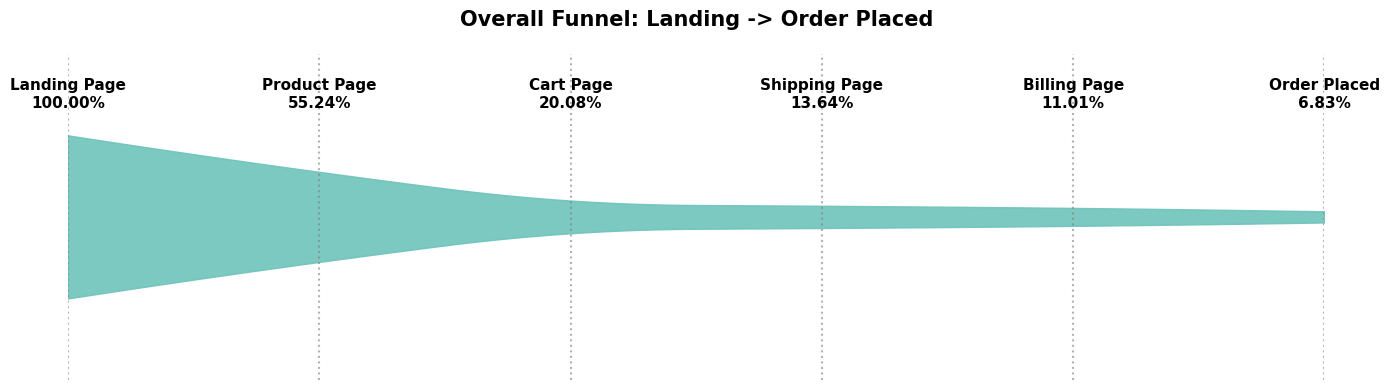

In [26]:
plot_horizontal_stream_funnel_overall(
    funnel_summary,
    title="Overall Funnel: Landing -> Order Placed"
)

##### 3) Cohort Analysis

In [27]:
# Ensure datetime
website_sessions["created_at"] = pd.to_datetime(website_sessions["created_at"])

# Create 1-month cohorts
website_sessions["cohort"] = (
    website_sessions["created_at"]
    .dt.to_period("1M")
    .astype(str)
)

In [28]:
# Merge cohort info into funnel_data
funnel_data1 = funnel_data.copy()
funnel_data1 = funnel_data1.merge(
    website_sessions[["website_session_id", "cohort"]],
    on="website_session_id",
    how="left"
)

funnel_stages = [
    "landing_page",
    "product_view",
    "cart_view",
    "shipping_view",
    "billing_view",
    "order_placed"
]

In [29]:
# get the raw counts
cohort_funnel = (
    funnel_data1
    .groupby("cohort")[[f"reached_{s}" for s in funnel_stages]]
    .sum()
    .reset_index()
)

# rename columns for clarity
cohort_funnel.columns = ["cohort"] + funnel_stages

print("Raw counts:")
print(cohort_funnel.head())

# create a new column for percentages
# need to preserve landing_page = 100% for each cohort
for stage in funnel_stages:
    cohort_funnel[f"{stage}_pct"] = cohort_funnel[stage] / cohort_funnel["landing_page"] * 100

# create a clean version for plotting (with percentages)
cohort_funnel_plot = cohort_funnel[["cohort"] + [f"{s}_pct" for s in funnel_stages]].copy()
cohort_funnel_plot.columns = ["cohort"] + funnel_stages

print("\nPercentages for plotting:")
print(cohort_funnel_plot.head())

Raw counts:
    cohort  landing_page  product_view  cart_view  shipping_view  \
0  2012-03          1879           743        229            157   
1  2012-04          3734          1447        436            285   
2  2012-05          3736          1585        477            313   
3  2012-06          3963          1751        559            380   
4  2012-07          4249          2019        637            421   

   billing_view  order_placed  
0           124            60  
1           231            99  
2           260           108  
3           321           140  
4           365           169  

Percentages for plotting:
    cohort  landing_page  product_view  cart_view  shipping_view  \
0  2012-03        100.00         39.54      12.19           8.36   
1  2012-04        100.00         38.75      11.68           7.63   
2  2012-05        100.00         42.43      12.77           8.38   
3  2012-06        100.00         44.18      14.11           9.59   
4  2012-07        10

In [30]:
def plot_cohort_stream_funnel(
    cohort_funnel,
    start_date,
    end_date,
    rolling_cohorts=5,
    title="User Funnel by Cohort"
):
    """
    Parameters
    ----------
    cohort_funnel : pd.DataFrame
        Funnel percentages by cohort (5 cohorts max)
        Should have columns: cohort, landing_page, product_view, cart_view, etc.
        All values should be percentages (e.g., 100.0, 39.5, 12.2, etc.)
    start_date : str or datetime
    end_date : str or datetime
    rolling_cohorts : int
        Max number of most recent cohorts to show
    """

    # ---- Validate dates ----
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    if start_date >= end_date:
        raise ValueError("start_date must be earlier than end_date")

    # ---- Parse cohort start ----
    cohort_funnel = cohort_funnel.copy()
    cohort_funnel["cohort_start"] = (
        pd.PeriodIndex(cohort_funnel["cohort"], freq="1M")
        .to_timestamp()
    )

    # ---- Filter to time window ----
    cohort_funnel = cohort_funnel[
        (cohort_funnel["cohort_start"] >= start_date) &
        (cohort_funnel["cohort_start"] <= end_date)
    ].sort_values("cohort_start")

    if cohort_funnel.empty:
        raise ValueError("No cohorts found in the selected time window")

    # ---- Rolling cohort window (MOST RECENT) ----
    cohort_funnel = cohort_funnel.tail(rolling_cohorts)

    # ---- Plot setup ----
    stages = funnel_stages
    cohorts = cohort_funnel["cohort"].values

    colors = plt.cm.Set2.colors
    x = np.arange(len(stages))
    x_smooth = np.linspace(x.min(), x.max(), 400)

    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor("white")

    # Store data for annotations
    cohort_y_values = {}  # Store y values (percentages) for each cohort
    cohort_y_decimal = {}  # Store y values (decimals) for each cohort
    
    # Track cumulative heights at each stage
    cumulative_baselines = np.zeros((len(stages), len(cohorts) + 1))
    
    # First pass: calculate cumulative baselines
    for stage_idx, stage in enumerate(stages):
        baseline = 0
        cumulative_baselines[stage_idx, 0] = 0  # Start at 0
        
        for i, cohort in enumerate(cohorts):
            y_value = cohort_funnel.loc[cohort_funnel["cohort"] == cohort, stage].values[0]
            cohort_y_values.setdefault(cohort, []).append(y_value)
            cohort_y_decimal.setdefault(cohort, []).append(y_value / 100)
            
            baseline += y_value / 100
            cumulative_baselines[stage_idx, i + 1] = baseline

    # Convert lists to arrays
    for cohort in cohorts:
        cohort_y_values[cohort] = np.array(cohort_y_values[cohort])
        cohort_y_decimal[cohort] = np.array(cohort_y_decimal[cohort])

    # ---- Stream layers ----
    baseline = np.zeros_like(x_smooth)
    
    for i, cohort in enumerate(cohorts):
        # Get decimal values for this cohort
        y_decimal = cohort_y_decimal[cohort]
        
        spline = make_interp_spline(x, y_decimal, k=2)
        y_smooth = spline(x_smooth)

        ax.fill_between(
            x_smooth,
            baseline,
            baseline + y_smooth,
            color=colors[i % len(colors)],
            alpha=0.85,
            label=str(cohort),
            edgecolor='white',
            linewidth=0.5
        )

        baseline += y_smooth

    # ---- Add percentage annotations for each cohort at each stage ----
    for i, cohort in enumerate(cohorts):
        y_pct = cohort_y_values[cohort]  # Percentages
        
        for stage_idx, stage in enumerate(stages):
            # Get the bottom and top of this cohort's layer at this stage
            layer_bottom = cumulative_baselines[stage_idx, i]
            layer_top = cumulative_baselines[stage_idx, i + 1]
            layer_center = (layer_bottom + layer_top) / 2
            
            # Format percentage text
            pct_value = y_pct[stage_idx]
            
            # Skip very small annotations to avoid clutter
            if pct_value < 0.5:
                continue
                
            pct_text = f"{pct_value:.1f}%"
            
            # Determine text color based on background color
            color_idx = i % len(colors)
            bg_color = colors[color_idx]
            
            # Calculate brightness of background color
            brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
            text_color = "white" if brightness < 0.6 else "black"
            
            # Adjust font size
            fontsize = 10 if pct_value > 15 else (9 if pct_value > 5 else 8)
            fontweight = "normal"
            
            # Add annotation
            ax.text(
                stage_idx,      # x position
                layer_center,   # y position (center of layer)
                pct_text,
                ha="center",
                va="center",
                fontsize=fontsize,
                fontweight=fontweight,
                color=text_color,
                bbox=dict(
                    boxstyle="round,pad=0.2", 
                    facecolor=bg_color, 
                    alpha=0.7,
                    edgecolor='white',
                    linewidth=0.5
                ) if pct_value < 10 else None
            )

    # ---- Stage separators ----
    for xi in x:
        ax.axvline(x=xi, linestyle=":", color="gray", alpha=0.3, linewidth=1)

    # ---- Stage labels ----
    for i, stage in enumerate(stages):
        stage_label = stage.replace("_", " ").title()
        # For better readability
        if stage == "order_placed":
            stage_label = "Order Placed"
        
        ax.text(
            i,
            baseline.max() * 1.05,
            stage_label,
            ha="center",
            va="bottom",
            fontsize=12,
            fontweight="bold"
        )

    # ---- Formatting ----
    ax.set_xlim(x.min() - 0.1, x.max() + 0.1)
    ax.set_ylim(0, baseline.max() * 1.15)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title(
        f"{title}\n({start_date.date()} -> {end_date.date()})",
        fontsize=12,
        fontweight="bold",
        pad=10
    )

    # ---- Add y-axis percentage guide ----
    ax.text(
        -0.15,
        baseline.max() / 2,
        "Conversion %",
        ha="center",
        va="center",
        rotation=90,
        fontsize=10,
        fontweight="bold"
    )

    # ---- Legend ----
    # Create a custom legend
    legend_elements = []
    for i, cohort in enumerate(cohorts):
        legend_elements.append(plt.Rectangle((0, 0), 1, 1, 
                                           facecolor=colors[i % len(colors)],
                                           alpha=0.85,
                                           label=cohort))
    
    ax.legend(
        handles=legend_elements,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=min(len(cohorts), 5),
        frameon=False,
        fontsize=10,
        title="Cohorts (by month)",
        title_fontsize=11
    )

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    return fig, ax

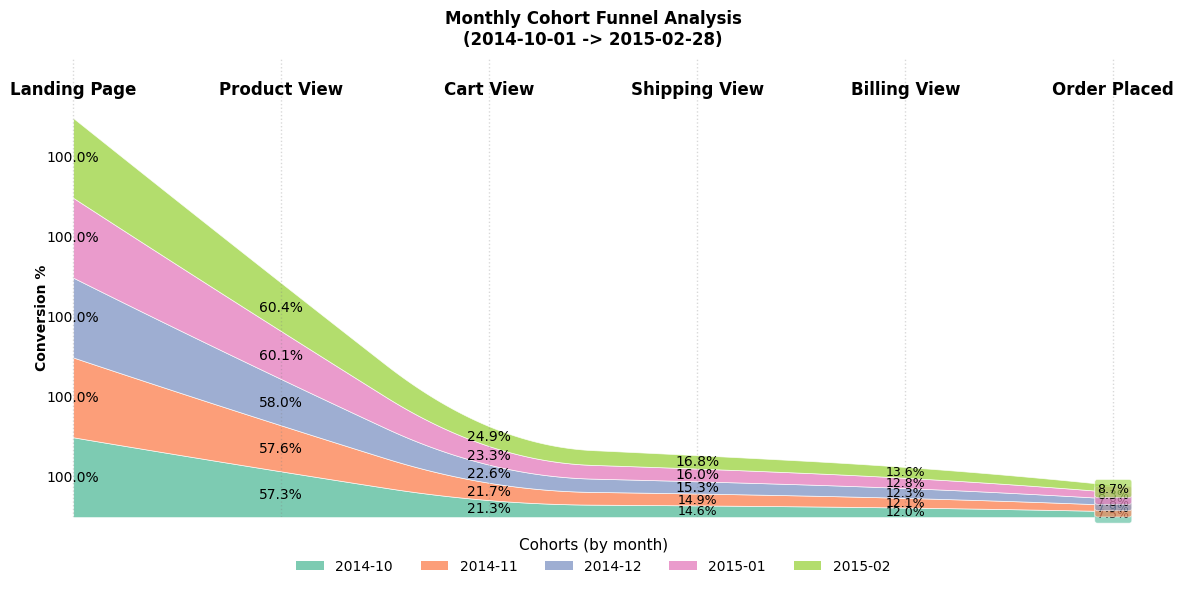

In [31]:
# Usage example
fig, ax = plot_cohort_stream_funnel(
    cohort_funnel_plot,  # Use the percentage DataFrame
    start_date="2014-10-01",
    end_date="2015-02-28",
    rolling_cohorts=6,
    title="Monthly Cohort Funnel Analysis"
)

plt.show()

##### 4) Overall plots and insights

In [32]:
def create_ecommerce_funnel_plot(funnel_df, cohort_funnel_df=None, title="E-commerce Conversion Funnel", 
                                 show_insights=True, cohort_start_date=None, cohort_end_date=None):
    """
    Create a comprehensive e-commerce dashboard with funnel analysis.
    
    Parameters:
    -----------
    funnel_df : pandas DataFrame
        DataFrame with columns: ['Stage', 'Count', 'Percentage', 'Dropoff_Rate', 'Conversion_to_Next']
    cohort_funnel_df : pandas DataFrame, optional
        DataFrame with cohort funnel percentages (cohort, landing_page, product_view, etc.)
    title : str
        Title for the plot
    show_insights : bool
        Whether to show insights and recommendations
    cohort_start_date : str or datetime, optional
        Start date for cohort filtering (if not provided, uses data range)
    cohort_end_date : str or datetime, optional
        End date for cohort filtering (if not provided, uses data range)
    
    Returns:
    --------
    fig : matplotlib Figure
    axes : tuple of matplotlib Axes
    """
    # Create a copy to avoid modifying the original
    funnel_df = funnel_df.copy()
    
    # Prepare data
    stages = funnel_df['Stage'].tolist()
    counts = funnel_df['Count'].tolist()
    percentages = funnel_df['Percentage'].tolist()
    conversion_rates = funnel_df['Conversion_to_Next'].tolist()
    dropoff_rates = funnel_df['Dropoff_Rate'].tolist()
    
    # Colors for different stages
    stage_colors = {
        'Landing Page': '#3498db',      # Blue
        'Product': '#2ecc71',      # Green
        'Cart': '#f39c12',         # Orange
        'Shipping': '#9b59b6',     # Purple
        'Billing': '#34495e',      # Dark Blue
        'Order Placed': '#e74c3c'       # Red
    }
    
    # Get colors for each stage
    colors = [stage_colors.get(stage, '#3498db') for stage in stages]
    
    # Store cohort analysis results for insights
    cohort_insights = {}
    
    # Determine grid layout based on whether cohort data is provided
    if cohort_funnel_df is not None:
        # Create figure with white background - Larger for 4 plots
        fig = plt.figure(figsize=(16, 12))
        fig.patch.set_facecolor('white')
        
        # Create grid layout: 2 rows, 2 columns with more space for bottom row
        gs = fig.add_gridspec(2, 2, height_ratios=[1.6, 1.4], hspace=0.35, wspace=0.25)
        
        # Main funnel plot (top left)
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.set_facecolor('white')
        
        # Cohort stream funnel plot (top right)
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.set_facecolor('white')
        
        # Key metrics summary (bottom left)
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.set_facecolor('white')
        ax3.axis('off')
        
        # Insights and recommendations (bottom right)
        ax4 = fig.add_subplot(gs[1, 1])
        ax4.set_facecolor('white')
        ax4.axis('off')
        
        # Store all axes
        all_axes = (ax1, ax2, ax3, ax4)
        
        # ----- COHORT PLOT -----
        ax2.clear()
        ax2.set_facecolor('white')
        
        # Determine default dates if not provided
        if cohort_start_date is None or cohort_end_date is None:
            try:
                cohort_dates = pd.PeriodIndex(cohort_funnel_df["cohort"], freq="1M").to_timestamp()
                default_start = cohort_dates.min().strftime('%Y-%m-%d')
                default_end = cohort_dates.max().strftime('%Y-%m-%d')
            except:
                default_end = pd.Timestamp.now().strftime('%Y-%m-%d')
                default_start = (pd.Timestamp.now() - pd.DateOffset(months=6)).strftime('%Y-%m-%d')
            
            if cohort_start_date is None:
                cohort_start_date = default_start
            if cohort_end_date is None:
                cohort_end_date = default_end
        
        try:
            cohort_stages = ['landing_page', 'product_view', 'cart_view', 'shipping_view', 'billing_view', 'order_placed']
            cohort_funnel_filtered = cohort_funnel_df.copy()
            
            if 'cohort_start' not in cohort_funnel_filtered.columns:
                cohort_funnel_filtered["cohort_start"] = (
                    pd.PeriodIndex(cohort_funnel_filtered["cohort"], freq="1M")
                    .to_timestamp()
                )
            
            cohort_start_date_dt = pd.to_datetime(cohort_start_date)
            cohort_end_date_dt = pd.to_datetime(cohort_end_date)
            
            cohort_funnel_filtered = cohort_funnel_filtered[
                (cohort_funnel_filtered["cohort_start"] >= cohort_start_date_dt) &
                (cohort_funnel_filtered["cohort_start"] <= cohort_end_date_dt)
            ].sort_values("cohort_start").tail(5)
            
            if not cohort_funnel_filtered.empty:
                cohorts = cohort_funnel_filtered["cohort"].values
                
                # Store cohort data for insights
                cohort_insights['data'] = cohort_funnel_filtered
                cohort_insights['cohorts'] = cohorts
                
                # Calculate cohort trends for insights
                if len(cohorts) >= 2:
                    # Calculate improvement/decline between oldest and newest cohort
                    oldest_cohort = cohort_funnel_filtered.iloc[0]
                    newest_cohort = cohort_funnel_filtered.iloc[-1]
                    
                    improvement_data = {}
                    for stage in cohort_stages:
                        if stage != 'landing_page':  # Skip landing page (always 100%)
                            old_val = oldest_cohort[stage]
                            new_val = newest_cohort[stage]
                            change = new_val - old_val
                            if abs(change) > 0.5:  # Only show meaningful changes
                                improvement_data[stage] = {
                                    'change': change,
                                    'old': old_val,
                                    'new': new_val
                                }
                    cohort_insights['improvements'] = improvement_data
                
                colors = plt.cm.Set2.colors
                x = np.arange(len(cohort_stages))
                x_smooth = np.linspace(x.min(), x.max(), 400)
                
                cohort_y_values = {}
                cohort_y_decimal = {}
                cumulative_baselines = np.zeros((len(cohort_stages), len(cohorts) + 1))
                
                for stage_idx, stage in enumerate(cohort_stages):
                    baseline = 0
                    cumulative_baselines[stage_idx, 0] = 0
                    
                    for i, cohort in enumerate(cohorts):
                        y_value = cohort_funnel_filtered.loc[cohort_funnel_filtered["cohort"] == cohort, stage].values[0]
                        cohort_y_values.setdefault(cohort, []).append(y_value)
                        cohort_y_decimal.setdefault(cohort, []).append(y_value / 100)
                        
                        baseline += y_value / 100
                        cumulative_baselines[stage_idx, i + 1] = baseline
                
                for cohort in cohorts:
                    cohort_y_values[cohort] = np.array(cohort_y_values[cohort])
                    cohort_y_decimal[cohort] = np.array(cohort_y_decimal[cohort])
                
                baseline_stream = np.zeros_like(x_smooth)
                
                for i, cohort in enumerate(cohorts):
                    y_decimal = cohort_y_decimal[cohort]
                    spline = make_interp_spline(x, y_decimal, k=2)
                    y_smooth = spline(x_smooth)

                    ax2.fill_between(
                        x_smooth,
                        baseline_stream,
                        baseline_stream + y_smooth,
                        color=colors[i % len(colors)],
                        alpha=0.85,
                        label=str(cohort),
                        edgecolor='white',
                        linewidth=0.5
                    )
                    baseline_stream += y_smooth
                
                for i, cohort in enumerate(cohorts):
                    y_pct = cohort_y_values[cohort]
                    
                    for stage_idx, stage in enumerate(cohort_stages):
                        layer_bottom = cumulative_baselines[stage_idx, i]
                        layer_top = cumulative_baselines[stage_idx, i + 1]
                        layer_center = (layer_bottom + layer_top) / 2
                        
                        pct_value = y_pct[stage_idx]
                        if pct_value < 0.5:
                            continue
                            
                        pct_text = f"{pct_value:.1f}%"
                        color_idx = i % len(colors)
                        bg_color = colors[color_idx]
                        brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
                        text_color = "white" if brightness < 0.6 else "black"
                        
                        fontsize = 9 if pct_value > 10 else 8
                        ax2.text(
                            stage_idx,
                            layer_center,
                            pct_text,
                            ha="center",
                            va="center",
                            fontsize=fontsize,
                            color=text_color,
                            bbox=dict(
                                boxstyle="round,pad=0.2", 
                                facecolor=bg_color, 
                                alpha=0.7,
                                edgecolor='white',
                                linewidth=0.5
                            ) if pct_value < 15 else None
                        )
                
                for xi in x:
                    ax2.axvline(x=xi, linestyle=":", color="gray", alpha=0.3, linewidth=1)
                
                for i, stage in enumerate(cohort_stages):
                    stage_label = stage.replace("_", " ").title()
                    if stage == "order_placed":
                        stage_label = "Order Placed"
                    
                    ax2.text(
                        i,
                        baseline_stream.max() * 1.05,
                        stage_label,
                        ha="center",
                        va="bottom",
                        fontsize=10,
                        fontweight="bold"
                    )
                
                ax2.set_xlim(x.min() - 0.1, x.max() + 0.1)
                ax2.set_ylim(0, baseline_stream.max() * 1.15)
                ax2.set_xticks([])
                ax2.set_yticks([])
                ax2.set_title(f'Cohort Analysis\n({cohort_start_date_dt.date()} to {cohort_end_date_dt.date()})', 
                             fontsize=13, fontweight='bold', pad=5)
                
                ax2.legend(
                    loc="lower center",
                    bbox_to_anchor=(0.5, -0.2),
                    ncol=min(len(cohorts), 4),
                    frameon=False,
                    fontsize=9,
                    title="Cohorts",
                    title_fontsize=10
                )
                
                for spine in ax2.spines.values():
                    spine.set_visible(False)
            else:
                ax2.text(0.5, 0.5, "No cohort data\nfor selected period",
                        ha='center', va='center', fontsize=12, color='gray')
                ax2.set_title('Cohort Analysis', fontsize=13, fontweight='bold')
                ax2.axis('off')
                
        except Exception as e:
            ax2.text(0.5, 0.5, f"Error plotting\ncohort data: {str(e)[:30]}...",
                    ha='center', va='center', fontsize=12, color='red')
            ax2.set_title('Cohort Analysis', fontsize=13, fontweight='bold')
            ax2.axis('off')
        
    else:
        # Create figure with white background - Smaller for 3 plots
        fig = plt.figure(figsize=(14, 9))
        fig.patch.set_facecolor('white')
        
        # Create grid layout: 2 rows, 2 columns (but only use 3)
        gs = fig.add_gridspec(2, 2, height_ratios=[1.8, 1], hspace=0.3, wspace=0.25)
        
        # Main funnel plot (top left)
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.set_facecolor('white')
        
        # Key metrics summary (bottom left)
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.set_facecolor('white')
        ax3.axis('off')
        
        # Insights and recommendations (span right column)
        ax2 = fig.add_subplot(gs[:, 1])
        ax2.set_facecolor('white')
        ax2.axis('off')
        
        # Store all axes
        all_axes = (ax1, ax2, ax3)
    
    # Create funnel visualization on ax1
    n_stages = len(stages)
    y_positions = np.arange(n_stages)
    
    heights = [0.6] * n_stages
    max_width = 0.8
    widths = [pct/100 * max_width for pct in percentages]
    
    for i, (stage, count, pct, width, height, color, conv_rate) in enumerate(
        zip(stages, counts, percentages, widths, heights, colors, conversion_rates)):
        
        bar = ax1.barh(y_positions[i], width, height=height, 
                      color=color, alpha=0.85, edgecolor='white', linewidth=2)
        
        stage_short = stage.replace(' View', '').replace(' Page', '').replace(' Order ', ' ')
        ax1.text(-0.12, y_positions[i], stage_short, 
                ha='right', va='center', fontsize=11, fontweight='bold')
        
        text_color = 'white' if pct > 20 else 'black'
        ax1.text(width/2, y_positions[i], 
                f'{count:,}\n({pct:.1f}%)', 
                ha='center', va='center', color=text_color, 
                fontweight='bold', fontsize=10)
        
        if i > 0 and dropoff_rates[i] > 0:
            prev_width = widths[i-1]
            arrow_start_x = prev_width + 0.02
            arrow_end_x = width + 0.02
            
            ax1.annotate('', 
                        xy=(arrow_end_x, y_positions[i] + height/3),
                        xytext=(arrow_start_x, y_positions[i-1] - height/3),
                        arrowprops=dict(arrowstyle='->', color='#e74c3c', lw=1.5, alpha=0.7))
            
            dropoff_pct = dropoff_rates[i] * 100
            ax1.text((arrow_start_x + arrow_end_x)/2, 
                    (y_positions[i] + y_positions[i-1])/2,
                    f'↓ {dropoff_pct:.1f}%', 
                    ha='left', va='center', fontsize=9, color='#e74c3c',
                    fontweight='bold', alpha=0.8)
    
    ax1.set_xlim(-0.15, 1.0)
    ax1.set_ylim(-0.5, n_stages)
    ax1.set_yticks([])
    ax1.set_xlabel('Page Progress', fontsize=11)
    ax1.set_title('Customer Journey Funnel', fontsize=13, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.2, axis='x', linestyle='--')
    
    for spine in ['top', 'right', 'left']:
        ax1.spines[spine].set_visible(False)
    
    # Key metrics summary (always on ax3)
    overall_conversion = percentages[-1]
    
    cart_idx = next((i for i, s in enumerate(stages) if 'Cart' in s), -1)
    order_idx = next((i for i, s in enumerate(stages) if 'Order Placed' in s), -1)
    
    if cart_idx >= 0 and order_idx >= 0:
        cart_to_order_rate = (percentages[order_idx] / percentages[cart_idx] * 100) if percentages[cart_idx] > 0 else 0
        cart_abandonment = 100 - cart_to_order_rate
    else:
        cart_to_order_rate = 0
        cart_abandonment = 0
    
    # Create metrics text
    metrics_text = "KEY PERFORMANCE INDICATORS\n"
    metrics_text += "=" * 25 + "\n"
    
    metrics_text += f"Overall Conversion: {overall_conversion:.2f}%\n"
    metrics_text += f"Cart to Order: {cart_to_order_rate:.1f}%\n"
    metrics_text += f"Cart Abandonment: {cart_abandonment:.1f}%\n\n"
    
    metrics_text += f"Landing Sessions: {counts[0]:,}\n"
    metrics_text += f"Orders Placed: {counts[-1]:,}\n\n"
    
    if len(conversion_rates) > 1:
        best_idx = np.argmax(conversion_rates[1:]) + 1
        worst_idx = np.argmin(conversion_rates[1:]) + 1
        
        best_stage = stages[best_idx].replace(' View', '').replace(' Page', '')
        worst_stage = stages[worst_idx].replace(' View', '').replace(' Page', '')
        
        metrics_text += f"Best Stage: {best_stage} ({conversion_rates[best_idx]:.1f}%)\n"
        metrics_text += f"Worst Stage: {worst_stage} ({conversion_rates[worst_idx]:.1f}%)\n"
    
    ax3.text(0.05, 0.97, metrics_text, 
             fontfamily='sans-serif', fontsize=9.5, linespacing=1.6,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.95, 
                      edgecolor='#ddd', pad=2))
    
    # Insights and recommendations
    if cohort_funnel_df is not None:
        insights_ax = ax4
    else:
        insights_ax = ax2
    
    if show_insights:
        insights_text = "ACTIONABLE INSIGHTS\n"
        insights_text += "=" * 20 + "\n"
        
        # Find biggest dropoff
        if len(dropoff_rates) > 1:
            biggest_drop_idx = np.argmax(dropoff_rates[1:]) + 1
            biggest_drop_stage = stages[biggest_drop_idx]
            biggest_drop_pct = dropoff_rates[biggest_drop_idx] * 100
            prev_stage = stages[biggest_drop_idx - 1]
            
            insights_text += f"Priority Area:\n"
            insights_text += f"  {prev_stage} -> {biggest_drop_stage}\n"
            insights_text += f"  Losing {biggest_drop_pct:.1f}% of users\n\n"
            
            # Stage-specific recommendations
            if 'Cart' in biggest_drop_stage:
                insights_text += "Recommendations:\n"
                insights_text += "  - Simplify cart process\n"
                insights_text += "  - Show cart preview\n"
                insights_text += "  - Add progress indicators\n"
            elif 'Shipping' in biggest_drop_stage:
                insights_text += "Recommendations:\n"
                insights_text += "  - Auto-fill address\n"
                insights_text += "  - Multiple shipping options\n"
                insights_text += "  - Clear delivery estimates\n"
            elif 'Billing' in biggest_drop_stage:
                insights_text += "Recommendations:\n"
                insights_text += "  - Multiple payment methods\n"
                insights_text += "  - Simplify payment form\n"
                insights_text += "  - Show security badges\n"
            elif 'Product' in biggest_drop_stage:
                insights_text += "Recommendations:\n"
                insights_text += "  - Better product images\n"
                insights_text += "  - Add customer reviews\n"
                insights_text += "  - Clear pricing info\n"
        
        # Add cohort insights if available
        if cohort_insights and 'improvements' in cohort_insights and cohort_insights['improvements']:
            insights_text += "\nCohort Trends:\n"
            improvements = cohort_insights['improvements']
            
            # Show top 3 improvements/declines
            sorted_improvements = sorted(improvements.items(), 
                                        key=lambda x: abs(x[1]['change']), 
                                        reverse=True)[:3]
            
            for stage, data in sorted_improvements:
                stage_name = stage.replace('_', ' ').title()
                if stage == 'order_placed':
                    stage_name = 'Order Placed'
                
                direction = "↑" if data['change'] > 0 else "↓"
                change_text = f"{direction}{abs(data['change']):.1f}%"
                
                if data['change'] > 0:
                    insights_text += f"  - {stage_name}: {change_text} improvement\n"
                else:
                    insights_text += f"  - {stage_name}: {change_text} decline\n"
        
        # Quick wins section
        insights_text += "\nOptimization Targets:\n"
        
        high_conversion_stages = [stages[i] for i in range(1, len(conversion_rates)) if conversion_rates[i] > 70]
        if high_conversion_stages:
            short_stages = [s.replace(' View', '').replace(' Page', '') for s in high_conversion_stages[:2]]
            insights_text += f"  - Strengths: {', '.join(short_stages)}\n"
        
        low_conversion_stages = [stages[i] for i in range(1, len(conversion_rates)) if conversion_rates[i] < 40]
        if low_conversion_stages:
            short_stages = [s.replace(' View', '').replace(' Page', '') for s in low_conversion_stages[:2]]
            insights_text += f"  - Focus Areas: {', '.join(short_stages)}"
        
        # Overall assessment
        if overall_conversion > 10:
            insights_text += "  - Status: Excellent conversion rate\n"
        elif overall_conversion > 5:
            insights_text += "  - Status: Good, room for improvement\n"
        else:
            insights_text += "  - Status: Needs significant optimization\n"
        
        insights_ax.text(0.05, 1, insights_text,
                         fontsize=9, linespacing=1.4,  # Smaller font and tighter spacing
                         verticalalignment='top',
                         bbox=dict(boxstyle='round', facecolor='#e8f4f8', alpha=0.95, 
                                  edgecolor='#3498db', pad=2))
    
    # Main title
    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.95)
    
    # Add footer
    fig.text(0.2, 0.1, 
             f"Analysis based on {counts[0]:,} sessions | Generated: {pd.Timestamp.now().strftime('%Y-%m-%d')}",
             ha='center', fontsize=8.5, color='#666666', style='italic')

    return fig, all_axes



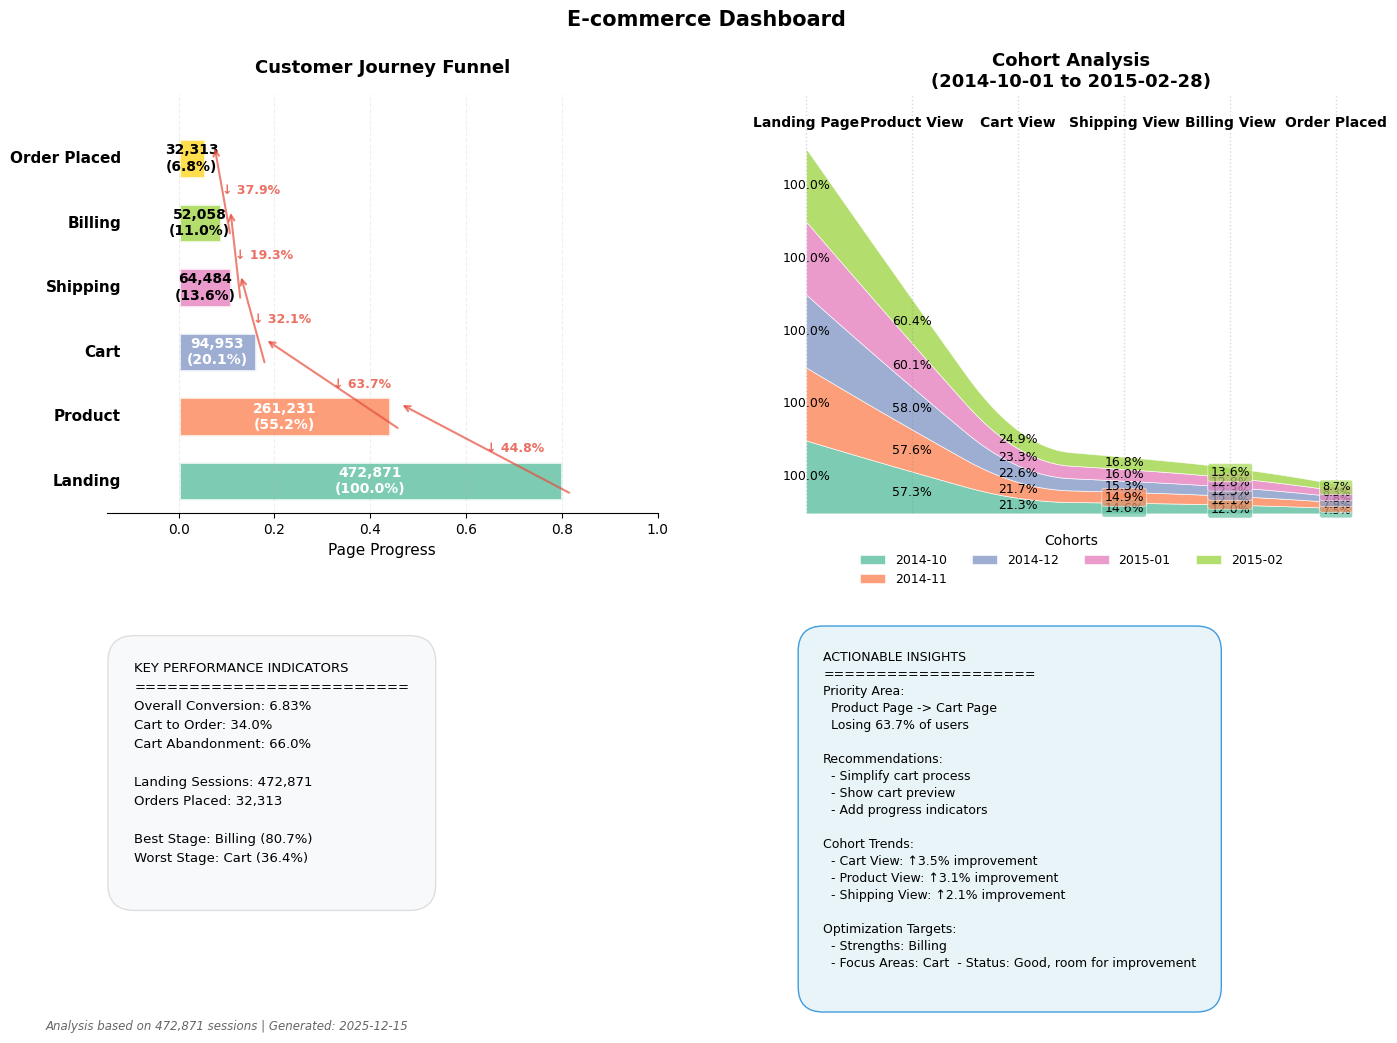

In [33]:
# With cohort data
fig, axes = create_ecommerce_funnel_plot(
    funnel_df=funnel_summary,
    cohort_funnel_df=cohort_funnel_plot,
    title="E-commerce Dashboard",
    show_insights=True,
    cohort_start_date="2014-10-01",
    cohort_end_date="2015-02-28"
)

# Without cohort data
# fig, axes = create_ecommerce_funnel_plot(
#     funnel_df=funnel_summary,
#     cohort_funnel_df=None,
#     title="E-commerce Funnel Analysis",
#     show_insights=True
# )